<img src="http://escolar.itam.mx/centro_tesis/img/logo-ITAM.png" style="width:250px">
# Machine Learning

## K-means
Tarea 13 : Gustavo Augusto Mondragón Sánchez : 136894

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split

#### División de los datos

In [2]:
#Cargar los datos desde repositorio online:
da = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',delimiter=',',header=None)
da.columns = ["Sex","Length","Diameter","Height","Whole_weight",
                  "Shucked_weight","Viscera_weight","Shell_weight","Rings"]
da.info()
da.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_weight      4177 non-null float64
Shucked_weight    4177 non-null float64
Viscera_weight    4177 non-null float64
Shell_weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [3]:
da.Sex = da.Sex.astype('category').cat.codes

Y = da["Rings"]
X = da.drop('Rings', 1)

#Split data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state=136894)

#Normalize data:
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

#### Modelos ANTES de realizar K-means

In [4]:
print("Accuracy:")
#Neural net
hl_clf = MLPClassifier(solver='adam', alpha=1,random_state=10, hidden_layer_sizes=(9,9,9))
hl_clf.fit(xtrain, ytrain.ravel())  
hl_ypred = hl_clf.predict(xtest)
hl_y_score = metrics.accuracy_score(ytest, hl_ypred)
print("Deep NN:       %f" % hl_y_score)

#Random Forest:
clfR = RandomForestClassifier()
clfR = clfR.fit(xtrain, ytrain)
y_predR = clfR.predict(xtest)
rf_y_score = metrics.accuracy_score(ytest, y_predR)
print("Random Forest: %f" % rf_y_score)

Accuracy:
Deep NN:       0.282297
Random Forest: 0.239234


### K-means preprocesing

In [5]:
c = 7
km = KMeans(n_clusters=c, init="k-means++", n_init=10, 
                      max_iter=300, tol=0.0001, precompute_distances="auto", 
                      verbose=0, random_state=None, copy_x=True, 
                      n_jobs=1, algorithm="auto").fit(X)
label = km.labels_

#Split data clusterizado
msk = np.random.rand(len(da)) < 0.80
train = da[msk]
ytrain = train["Rings"]
xtrain = train.drop('Rings', 1)

test = da[~msk]
ytest = test["Rings"]
xtest = test.drop('Rings', 1)

labeln = label[msk]
labelt = label[~msk]

#Normalize data:
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

#### Modelos DESPUÉS de realizar K-means

In [6]:
import warnings
warnings.filterwarnings('ignore')
k_hl = np.zeros(c)
k_rf = np.zeros(c)
for i in range(c):
    hl_clf = MLPClassifier(solver='adam', alpha=1,random_state=10, hidden_layer_sizes=(9,9,9))
    clfR = RandomForestClassifier()
    
    X_tr = xtrain[labeln == i]
    Y_tr = ytrain[labeln == i]
    #Neural net
    hl_clf.fit(X_tr, Y_tr.ravel()) 
    #Random Forest:
    clfR = clfR.fit(xtrain, ytrain)
    
    #Resultados:
    print("Predicción cluster:",i)
    hl_ypred = hl_clf.predict(xtest[labelt == i])
    k_hl[i] = metrics.accuracy_score(ytest[labelt == i], hl_ypred)
    print("Deep NN:       %f" % k_hl[i])
    y_predR = clfR.predict(xtest[labelt == i])
    k_rf[i] = metrics.accuracy_score(ytest[labelt == i], y_predR)
    print("Random Forest: %f" % k_rf[i])

Predicción cluster: 0
Deep NN:       0.165517
Random Forest: 0.131034
Predicción cluster: 1
Deep NN:       0.419048
Random Forest: 0.266667
Predicción cluster: 2
Deep NN:       0.237762
Random Forest: 0.167832
Predicción cluster: 3
Deep NN:       0.257143
Random Forest: 0.157143
Predicción cluster: 4
Deep NN:       0.385185
Random Forest: 0.325926
Predicción cluster: 5
Deep NN:       0.242424
Random Forest: 0.196970
Predicción cluster: 6
Deep NN:       0.283333
Random Forest: 0.300000


### Comparativo:

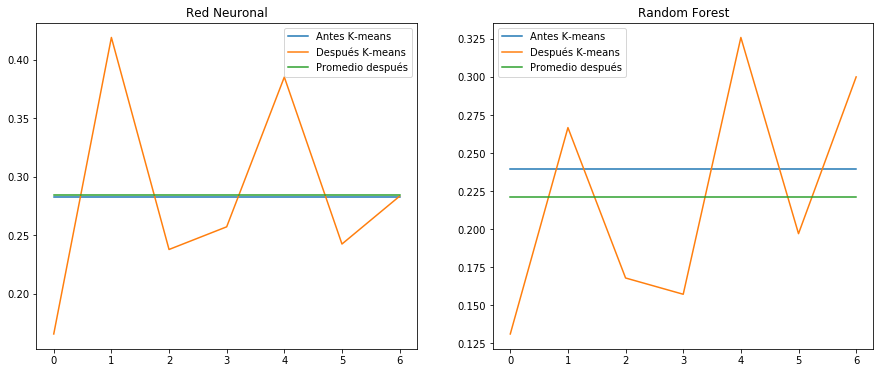

In [7]:
#rf_y_score hl_y_score
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot([0,c-1],[hl_y_score,hl_y_score])
plt.plot(range(0,c),k_hl)
pnn = np.mean(k_hl)
plt.plot([0,c-1],[pnn,pnn])
plt.legend(["Antes K-means","Después K-means","Promedio después"])
plt.title("Red Neuronal")
plt.subplot(1,2,2)
plt.plot([0,c-1],[rf_y_score,rf_y_score])
plt.plot(range(0,c),k_rf)
prf = np.mean(k_rf)
plt.plot([0,c-1],[prf,prf])
plt.legend(["Antes K-means","Después K-means","Promedio después"])
plt.title("Random Forest")

plt.show()

### Conclusiones:
En general hay veces que el modelo especializado por clusters tiene mejores resultados y veces que no, depende del modelo si en promedio se generan mejores predicciones. Por ejemplo, en las gráficas se aprecia que para la red neuronal, en promedio, tiene un desempeño un poco mejor (con resultados casi el doble de buenos que sin kmeans para la clase 1) pero en random forest, en promedio hay peor desempeño. 